<a href="https://colab.research.google.com/github/RocioLiu/Python_coding/blob/master/4_A_Simple_PyTorch_Training_Loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's put all the pieces together, and train a model:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib
import matplotlib.pyplot as plt


First, we'll need training and test datasets. If you haven't already, run the cell below to make sure the dataset is downloaded. (It may take a minute.)

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
type(trainset)

torchvision.datasets.cifar.CIFAR10

In [ ]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
type(trainloader)

torch.utils.data.dataloader.DataLoader

In [ ]:
trainloader

We'll run our check on the output from `DataLoader`:

dataiter: <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f66499a43d0>
image shape: torch.Size([4, 3, 32, 32]), labels shape: torch.Size([4])

  car  frog   dog plane


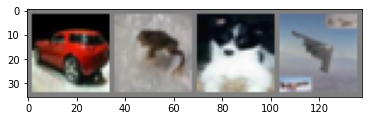

In [ ]:
# functions to show an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  
# get some random training images
dataiter = iter(trainloader)
print(f'dataiter: {dataiter}')
images, labels = dataiter.next()
print(f'image shape: {images.shape}, labels shape: {labels.shape}\n')

# Show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

This is the model we'll train. If it looks familiar, that's because it's a variant of LeNet - discussed earlier in this video - adapted for 3-color images.

In [ ]:
images.shape

torch.Size([4, 3, 32, 32])

In [ ]:
labels

tensor([0, 4, 9, 3])